Collaborated with Rishi Mule

# DBSCAN Problem 5

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Read CSV file into a DataFrame
df = pd.read_csv('dbscan.csv')

In [3]:
df

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...,...
75,NaN,75,39.659047,0.230178,3,"1,4,75"
76,NaN,76,26.366491,8.798826,3,"21,49,76"
77,NaN,77,-36.184060,44.292045,2,"55,77"
78,NaN,78,44.012085,37.729478,3,"9,33,78"


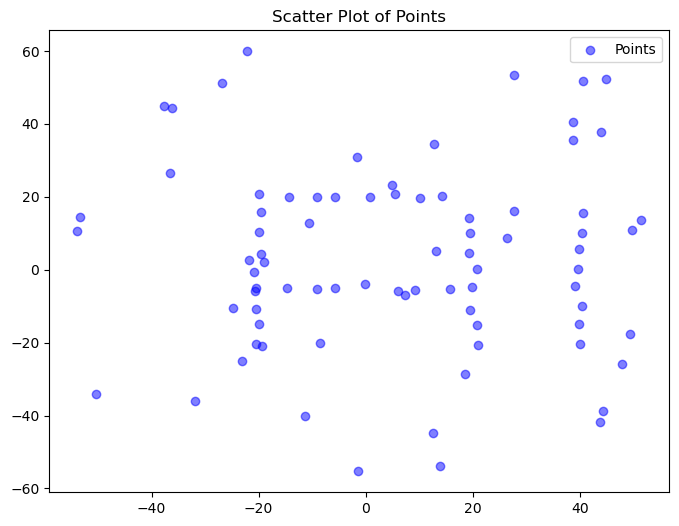

In [4]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='blue', alpha=0.5, label='Points')


# Set plot title
plt.title('Scatter Plot of Points')
plt.legend()

# Show plot
plt.show()

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 7.5, min_samples=3)
labels = dbscan.fit_predict(df[['x','y']])

print(np.unique(labels))


[-1  0  1  2]


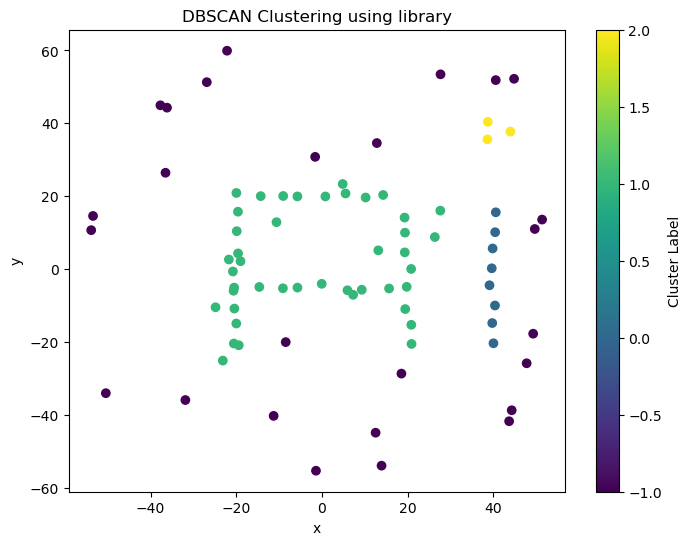

In [6]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering using library')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

In [7]:
def DBSCAN(dataframe, epsilon = 7.5, minPts = 3):
    core_points_list = dataframe.index[dataframe['num_neighbors'] >= 3].tolist()
    visited = 0
    cluster_no = 1
    while core_points_list:
        current_core_point = core_points_list.pop()
        if pd.isna(dataframe.loc[current_core_point, 'cluster']): 
            dataframe.loc[current_core_point, 'cluster'] = cluster_no
            all_core_neighbours_covered = False
            points_to_be_visited = set([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
            while points_to_be_visited:
                current_core_point = points_to_be_visited.pop()
                if pd.isna(dataframe.loc[current_core_point, 'cluster']):
                    dataframe.loc[current_core_point, 'cluster'] = cluster_no
                    if dataframe.loc[current_core_point, 'num_neighbors'] >= minPts:
                        points_to_be_visited.update([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
                        if current_core_point in core_points_list:
                            core_points_list.remove(current_core_point)
            cluster_no+=1
    df.loc[df['cluster'].isna(), 'cluster'] = -1

In [8]:
DBSCAN(df)

In [9]:
silhouette_avg = silhouette_score(df[['x','y','num_neighbors']], df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.09678866714422686


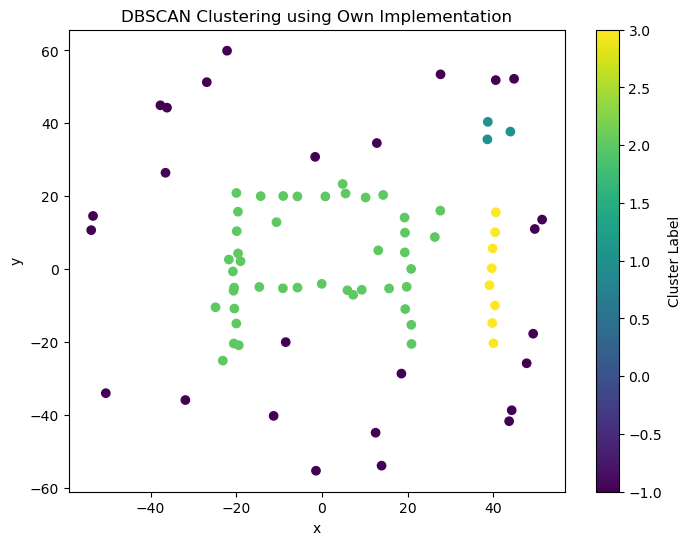

In [10]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering using Own Implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

# PROBLEM 6

## Circles

In [11]:
# Read CSV file into a DataFrame
circles_df = pd.read_csv('circle.csv')
circles_df = circles_df.rename(columns={'Xcircle_X1': 'x', 'Xcircle_X2': 'y'})
circles_df

,x,y
0,0.519781,-0.015981
1,-0.057719,-0.420279
2,-0.805155,-0.662227
3,0.316549,0.312730
4,-0.304804,0.407563
...,...,...
995,-0.222906,-0.326809
996,-0.766648,0.677558
997,-0.012036,0.396755
998,0.398129,0.318982


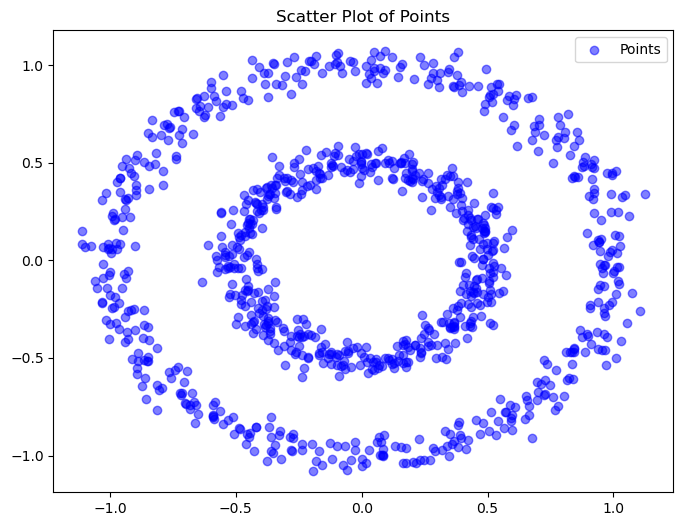

In [12]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(circles_df['x'], circles_df['y'], c='blue', alpha=0.5, label='Points')


# Set plot title
plt.title('Scatter Plot of Points')
plt.legend()

# Show plot
plt.show()

[0 1]


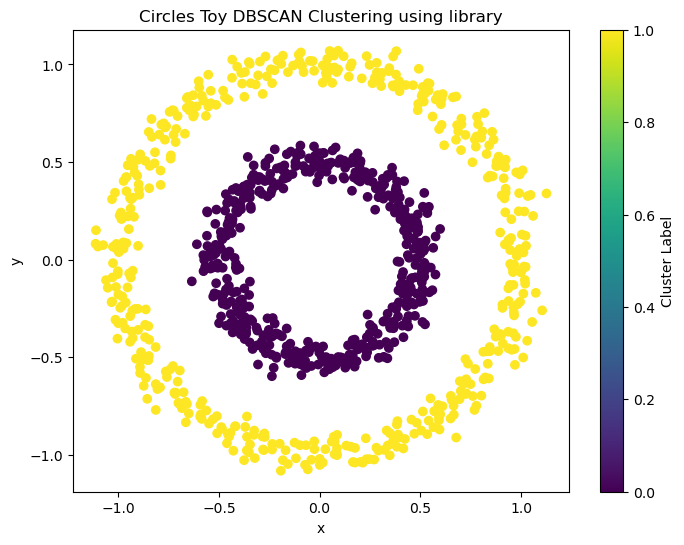

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples=5)
labels = dbscan.fit_predict(circles_df[['x','y']])

print(np.unique(labels))
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(circles_df['x'], circles_df['y'], c=labels, cmap='viridis')
plt.title('Circles Toy DBSCAN Clustering using library')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

In [14]:
# Assuming circles_df is your DataFrame
# Add new columns with default values
circles_df['cluster'] = np.nan
circles_df['num_neighbors'] = 0
circles_df['neighbors'] = ''

# Display the DataFrame with the new columns
circles_df


,x,y,cluster,num_neighbors,neighbors
0,0.519781,-0.015981,NaN,0,
1,-0.057719,-0.420279,NaN,0,
2,-0.805155,-0.662227,NaN,0,
3,0.316549,0.312730,NaN,0,
4,-0.304804,0.407563,NaN,0,
...,...,...,...,...,...
995,-0.222906,-0.326809,NaN,0,
996,-0.766648,0.677558,NaN,0,
997,-0.012036,0.396755,NaN,0,
998,0.398129,0.318982,NaN,0,


In [15]:

def neighborhood_creation(dataframe, epsilon):
    xy_columns = dataframe[['x', 'y']]
    distances = pdist(xy_columns.values)
    distances_matrix = squareform(distances)
    for i in range(len(dataframe)):
        neighbors = []
        for j in range(len(dataframe)):
            if distances_matrix[i][j]<=epsilon:
                neighbors.append(j)
        dataframe.loc[i, 'num_neighbors'] = len(neighbors)
        dataframe.loc[i, 'neighbors'] = ','.join(str(x) for x in neighbors)

def dbscan_own_impl(dataframe, epsilon = 7.5, minPts = 3):
    neighborhood_creation(dataframe, epsilon)
    core_points_list = dataframe.index[dataframe['num_neighbors'] >= 3].tolist()
    visited = 0
    cluster_no = 1
    while core_points_list:
        current_core_point = core_points_list.pop()
        if pd.isna(dataframe.loc[current_core_point, 'cluster']): 
            dataframe.loc[current_core_point, 'cluster'] = cluster_no
            all_core_neighbours_covered = False
            points_to_be_visited = set([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
            while points_to_be_visited:
                current_core_point = points_to_be_visited.pop()
                if pd.isna(dataframe.loc[current_core_point, 'cluster']):
                    dataframe.loc[current_core_point, 'cluster'] = cluster_no
                    if dataframe.loc[current_core_point, 'num_neighbors'] >= minPts:
                        points_to_be_visited.update([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
                        if current_core_point in core_points_list:
                            core_points_list.remove(current_core_point)
            cluster_no+=1
    dataframe.loc[dataframe['cluster'].isna(), 'cluster'] = -1


In [16]:
dbscan_own_impl(circles_df, epsilon = 0.2, minPts = 5)

In [17]:
silhouette_avg = silhouette_score(circles_df[['x','y','num_neighbors']], circles_df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.832374192912637


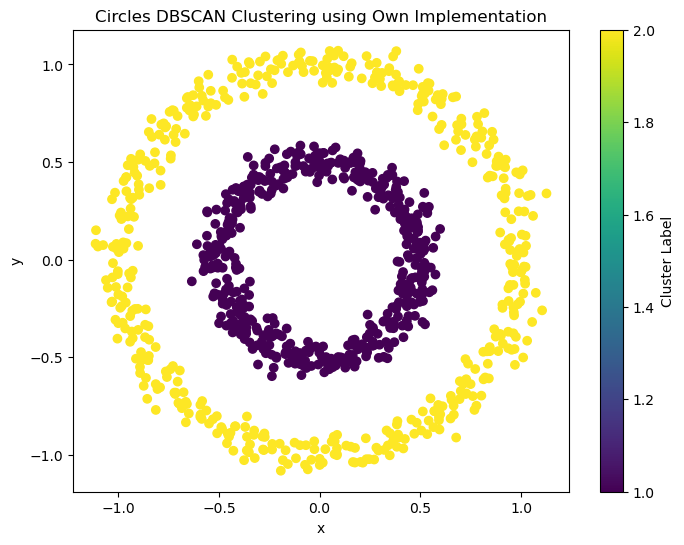

In [18]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(circles_df['x'], circles_df['y'], c=circles_df['cluster'], cmap='viridis')
plt.title('Circles DBSCAN Clustering using Own Implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

## Moons

In [19]:
# Read CSV file into a DataFrame
moons_df = pd.read_csv('moons.csv')
moons_df = moons_df.rename(columns={'Xmoons_X1': 'x', 'Xmoons_X2': 'y'})
moons_df

,x,y
0,-0.378142,0.940750
1,0.933566,0.153805
2,2.048309,0.498172
3,0.947891,0.162473
4,2.000739,0.183700
...,...,...
1495,-0.022346,0.425338
1496,0.090974,0.098361
1497,1.390850,-0.439987
1498,-0.652389,0.769648


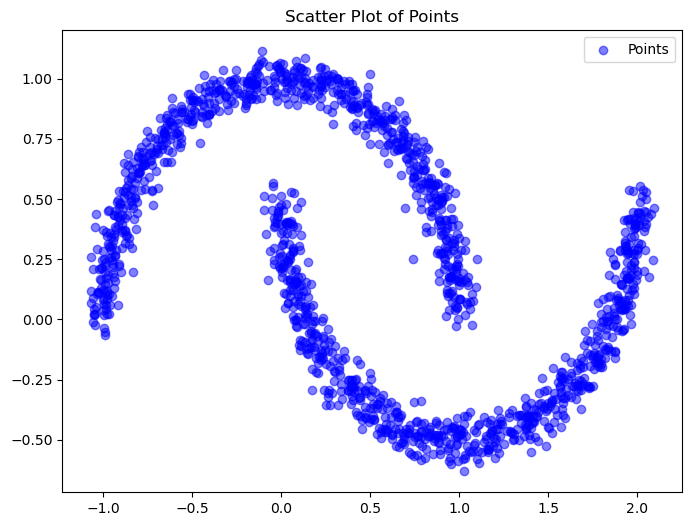

In [20]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(moons_df['x'], moons_df['y'], c='blue', alpha=0.5, label='Points')


# Set plot title
plt.title('Scatter Plot of Points')
plt.legend()

# Show plot
plt.show()

[0 1]


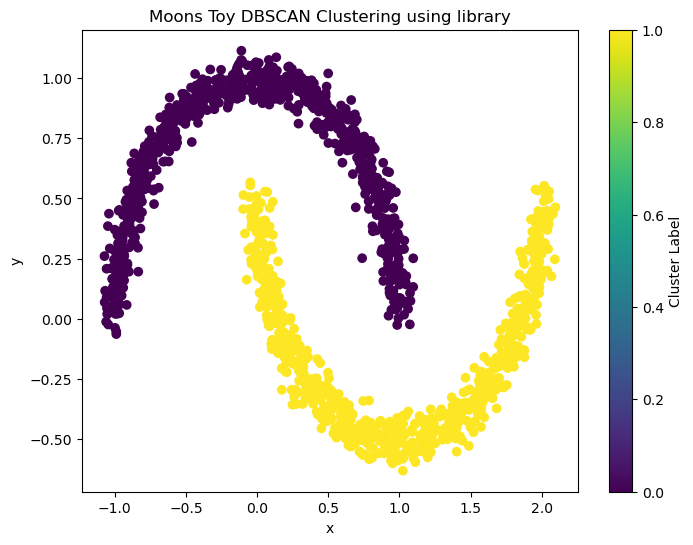

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples=5)
labels = dbscan.fit_predict(moons_df[['x','y']])

print(np.unique(labels))
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(moons_df['x'], moons_df['y'], c=labels, cmap='viridis')
plt.title('Moons Toy DBSCAN Clustering using library')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

In [22]:
# Add new columns with default values
moons_df['cluster'] = np.nan
moons_df['num_neighbors'] = 0
moons_df['neighbors'] = ''

# Display the DataFrame with the new columns
moons_df


,x,y,cluster,num_neighbors,neighbors
0,-0.378142,0.940750,NaN,0,
1,0.933566,0.153805,NaN,0,
2,2.048309,0.498172,NaN,0,
3,0.947891,0.162473,NaN,0,
4,2.000739,0.183700,NaN,0,
...,...,...,...,...,...
1495,-0.022346,0.425338,NaN,0,
1496,0.090974,0.098361,NaN,0,
1497,1.390850,-0.439987,NaN,0,
1498,-0.652389,0.769648,NaN,0,


In [23]:
dbscan_own_impl(moons_df, epsilon = 0.2, minPts = 5)


In [24]:
silhouette_avg = silhouette_score(moons_df[['x','y','num_neighbors']], moons_df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.029599344692967055


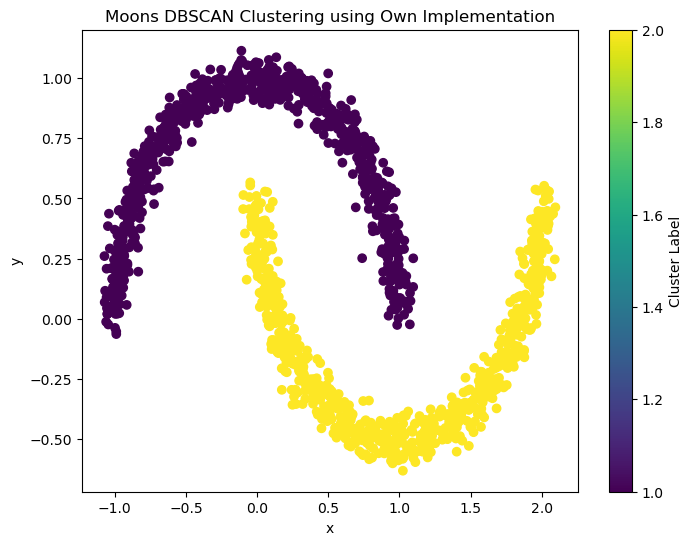

In [25]:

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(moons_df['x'], moons_df['y'], c=moons_df['cluster'], cmap='viridis')
plt.title('Moons DBSCAN Clustering using Own Implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

## Blobs

In [26]:
# Read CSV file into a DataFrame
blobs_df = pd.read_csv('blobs.csv')
blobs_df = blobs_df.rename(columns={'Xblobs_X1': 'x', 'Xblobs_X2': 'y'})
blobs_df

,x,y
0,1.684922,0.683154
1,-0.669550,-1.023103
2,-0.816166,-0.887977
3,1.188173,1.124579
4,1.179278,1.678473
...,...,...
1495,0.739083,0.791524
1496,0.985693,1.952298
1497,0.636495,0.830273
1498,0.984293,0.620427


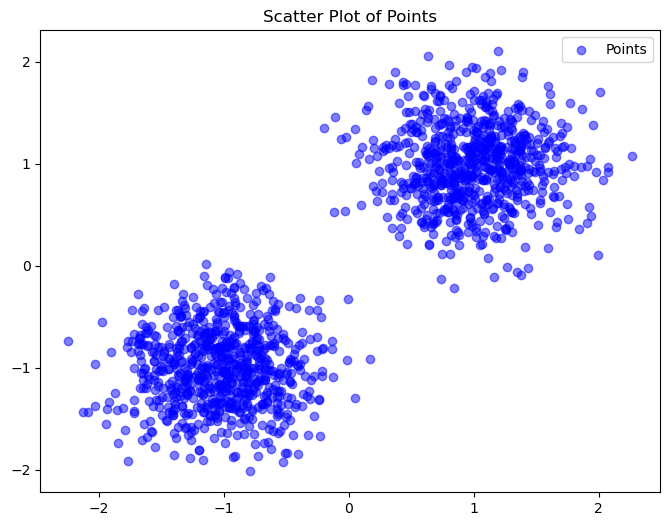

In [27]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(blobs_df['x'], blobs_df['y'], c='blue', alpha=0.5, label='Points')


# Set plot title
plt.title('Scatter Plot of Points')
plt.legend()

# Show plot
plt.show()

[0 1]


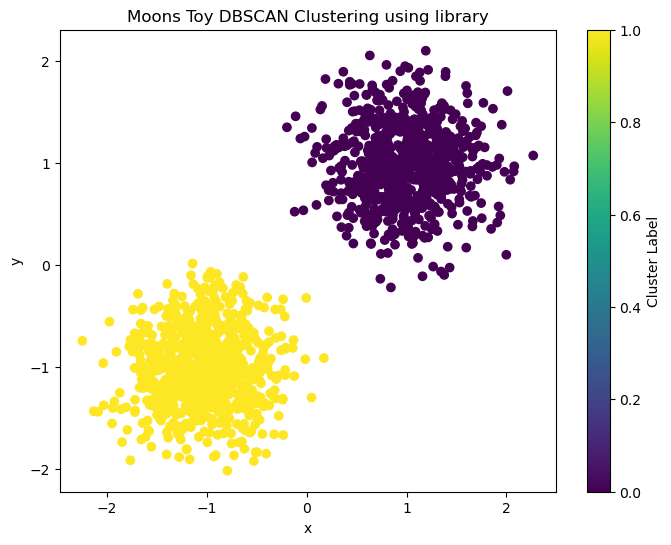

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.4, min_samples=5)
labels = dbscan.fit_predict(blobs_df[['x','y']])

print(np.unique(labels))
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(blobs_df['x'], blobs_df['y'], c=labels, cmap='viridis')
plt.title('Moons Toy DBSCAN Clustering using library')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

In [29]:
# Add new columns with default values
blobs_df['cluster'] = np.nan
blobs_df['num_neighbors'] = 0
blobs_df['neighbors'] = ''

# Display the DataFrame with the new columns
blobs_df


,x,y,cluster,num_neighbors,neighbors
0,1.684922,0.683154,NaN,0,
1,-0.669550,-1.023103,NaN,0,
2,-0.816166,-0.887977,NaN,0,
3,1.188173,1.124579,NaN,0,
4,1.179278,1.678473,NaN,0,
...,...,...,...,...,...
1495,0.739083,0.791524,NaN,0,
1496,0.985693,1.952298,NaN,0,
1497,0.636495,0.830273,NaN,0,
1498,0.984293,0.620427,NaN,0,


In [30]:
dbscan_own_impl(blobs_df, epsilon = 0.4, minPts = 5)


In [31]:
silhouette_avg = silhouette_score(blobs_df[['x','y','num_neighbors']], blobs_df['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.0012911451632655984


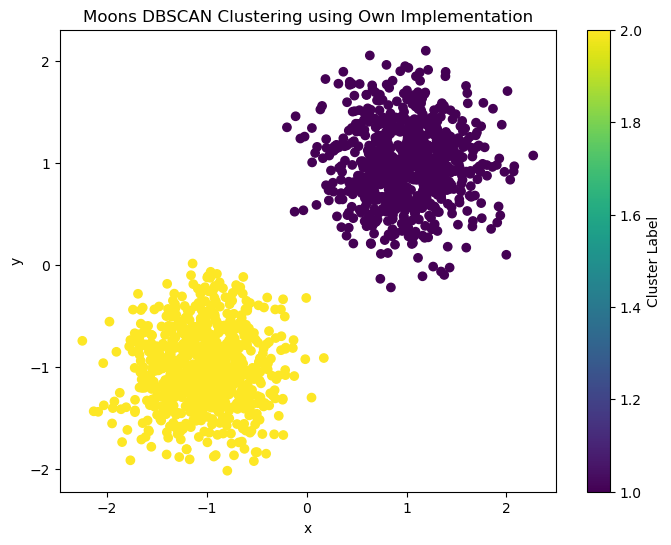

In [32]:

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(blobs_df['x'], blobs_df['y'], c=blobs_df['cluster'], cmap='viridis')
plt.title('Moons DBSCAN Clustering using Own Implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.show()

# Problem 7 DBSCAN on Real Data

## 20 NG

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Step 1: Load the 20 Newsgroups dataset
data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# Step 2: Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data.data)



In [54]:

# Step 4: DBSCAN Clustering
eps = 0.1  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 10  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(tfidf_matrix)

# Step 5: Evaluate the clustering
silhouette_avg = silhouette_score(tfidf_matrix, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.2358208816688058


In [62]:
n_clusters = len(set(clusters)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

Number of clusters: 2


In [140]:
df_columns = {
    'cluster': [np.nan] * len(similarities),
    'num_neighbors': [0] * len(similarities),
    'neighbors': [''] * len(similarities)
}

df_20NG = pd.DataFrame(df_columns)

df_20NG

,cluster,num_neighbors,neighbors
0,NaN,0,
1,NaN,0,
2,NaN,0,
3,NaN,0,
4,NaN,0,
...,...,...,...
18841,NaN,0,
18842,NaN,0,
18843,NaN,0,
18844,NaN,0,


In [114]:
def neighborhood_creation(df_20NG, tfidf_matrix, epsilon):
    from sklearn.metrics.pairwise import pairwise_distances

    # Calculate Euclidean distance between all pairs of points (documents) in the TF-IDF matrix
    distances_matrix = pairwise_distances(tfidf_matrix, metric='euclidean')
    
    for i in range(len(distances_matrix)):
        neighbors = []
        for j in range(len(distances_matrix)):
            if distances_matrix[i][j]<=epsilon:
                neighbors.append(j)
        df_20NG.loc[i, 'num_neighbors'] = len(neighbors)
        df_20NG.loc[i, 'neighbors'] = ','.join(str(x) for x in neighbors)


In [115]:
def dbscan_own_impl(dataframe, tfidf_matrix, epsilon = 7.5, minPts = 3):
    neighborhood_creation(dataframe, tfidf_matrix, epsilon)
    core_points_list = dataframe.index[dataframe['num_neighbors'] >= 3].tolist()
    visited = 0
    cluster_no = 1
    while core_points_list:
        current_core_point = core_points_list.pop()
        if pd.isna(dataframe.loc[current_core_point, 'cluster']): 
            dataframe.loc[current_core_point, 'cluster'] = cluster_no
            all_core_neighbours_covered = False
            points_to_be_visited = set([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
            while points_to_be_visited:
                current_core_point = points_to_be_visited.pop()
                if pd.isna(dataframe.loc[current_core_point, 'cluster']):
                    dataframe.loc[current_core_point, 'cluster'] = cluster_no
                    if dataframe.loc[current_core_point, 'num_neighbors'] >= minPts:
                        points_to_be_visited.update([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
                        if current_core_point in core_points_list:
                            core_points_list.remove(current_core_point)
            cluster_no+=1
    dataframe.loc[dataframe['cluster'].isna(), 'cluster'] = -1

In [133]:
np.mean(df_20NG['num_neighbors'])

1292.2620184654568

In [146]:
%%time
dbscan_own_impl(df_20NG, tfidf_matrix,.5, 2)

CPU times: total: 1min 57s
Wall time: 2min 21s


In [147]:
np.unique(df_20NG['cluster'])

array([-1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72.])

In [148]:

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_matrix, df_20NG['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.22408601521702032


## MNIST Fashion

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load fashion dataset from OpenML
fashion_mnist = fetch_openml(name='Fashion-MNIST')

# Split features and labels
X = fashion_mnist.data
y = fashion_mnist.target

# Standardize features
X = StandardScaler().fit_transform(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


C:\Users\dhans\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
first = X_pca[:,0]
second = X_pca[:,1]

In [35]:
mnist_df = pd.DataFrame({'x': first, 'y': second})


In [36]:
# Add new columns with default values
mnist_df['cluster'] = np.nan
mnist_df['num_neighbors'] = 0
mnist_df['neighbors'] = ''

# Display the DataFrame with the new columns
mnist_df

,x,y,cluster,num_neighbors,neighbors
0,-0.824695,20.862604,NaN,0,
1,17.073390,-4.966217,NaN,0,
2,-9.600036,-12.321928,NaN,0,
3,-0.310827,-11.590370,NaN,0,
4,8.975907,-12.880551,NaN,0,
...,...,...,...,...,...
69995,-5.775710,16.066842,NaN,0,
69996,-11.615810,-14.296728,NaN,0,
69997,-6.993530,-8.488647,NaN,0,
69998,-2.892285,-15.376467,NaN,0,


In [38]:
dbscan_own_impl(mnist_df[:5000], 0.5, 10)

In [39]:

# Calculate silhouette score
silhouette_avg = silhouette_score(mnist_df[['x','y']][:5000], mnist_df['cluster'][:5000])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.11141785849050057


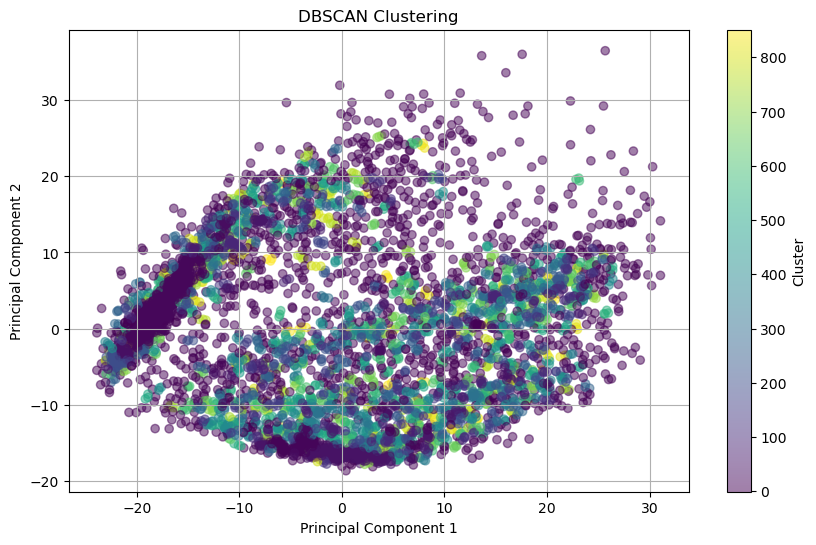

In [41]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(mnist_df['x'][:5000], mnist_df['y'][:5000], c=mnist_df['cluster'][:5000], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [47]:
np.unique(mnist_df['cluster'][:5000])

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [48]:
mnist_df = pd.DataFrame({'x': first, 'y': second})
# Add new columns with default values
mnist_df['cluster'] = np.nan
mnist_df['num_neighbors'] = 0
mnist_df['neighbors'] = ''


dbscan_own_impl(mnist_df[:5000], 0.5, 5)

In [49]:

# Calculate silhouette score
silhouette_avg = silhouette_score(mnist_df[['x','y']][:5000], mnist_df['cluster'][:5000])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.21835358685479186


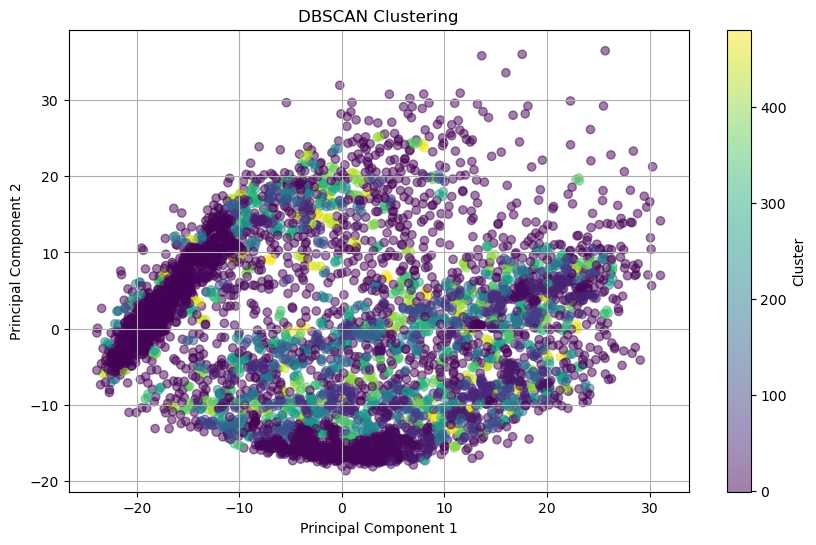

In [50]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(mnist_df['x'][:5000], mnist_df['y'][:5000], c=mnist_df['cluster'][:5000], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [51]:
np.unique(mnist_df['cluster'][:5000])

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [42]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: -0.4959860484467372


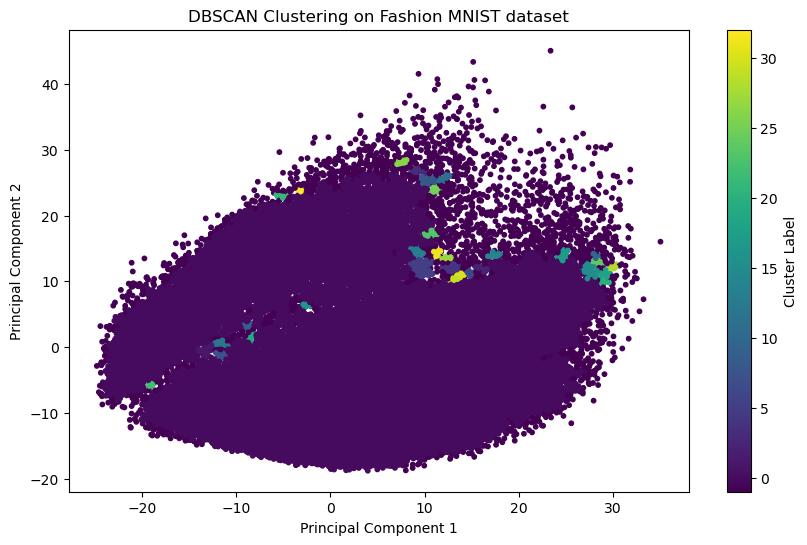

In [43]:

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('DBSCAN Clustering on Fashion MNIST dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


## Household Dataset

In [41]:

import pandas as pd

# Read the comma-separated text file into a DataFrame
household_df = pd.read_csv('household_power_consumption.txt', sep=';')
household_df


C:\Users\dhans\AppData\Local\Temp\ipykernel_6684\2557069037.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  household_df = pd.read_csv('household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [42]:
numeric_df = household_df.drop(columns=['Date', 'Time'])

# Find non-float unique values for each column
non_float_unique_values = {}
for column in numeric_df.columns:
    # Filter out values that cannot be converted to float
    non_float_values = []
    for value in numeric_df[column].unique():
        try:
            float_value = float(value)
        except ValueError:
            non_float_values.append(value)
    non_float_unique_values[column] = non_float_values

# Print non-float unique values for each column
for column, values in non_float_unique_values.items():
    print(f"Non-float unique values for column '{column}': {values}")

Non-float unique values for column 'Global_active_power': ['?']
Non-float unique values for column 'Global_reactive_power': ['?']
Non-float unique values for column 'Voltage': ['?']
Non-float unique values for column 'Global_intensity': ['?']
Non-float unique values for column 'Sub_metering_1': ['?']
Non-float unique values for column 'Sub_metering_2': ['?']
Non-float unique values for column 'Sub_metering_3': []


In [43]:
import numpy as np
from sklearn.cluster import DBSCAN

household_df.replace('?', np.nan, inplace=True)
print(len(household_df))
household_df.dropna(inplace=True)
print("After Dropping values",len(household_df))

2075259
After Dropping values 2049280


In [44]:

numeric_df = household_df.drop(columns=['Date', 'Time'])
numeric_df['Global_active_power'] = pd.to_numeric(numeric_df['Global_active_power'], errors='coerce')
numeric_df['Global_reactive_power'] = pd.to_numeric(numeric_df['Global_reactive_power'], errors='coerce')

# Drop rows with NaN values in either column
numeric_df.dropna(subset=['Global_active_power', 'Global_reactive_power'], inplace=True)


# Scale the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df[['Global_active_power', 'Global_reactive_power']])


In [45]:

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_features[:100000])

# Add cluster labels to the DataFrame
np.unique(labels)


array([-1,  0,  1], dtype=int64)

In [46]:

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features[:100000], labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7000953766992599


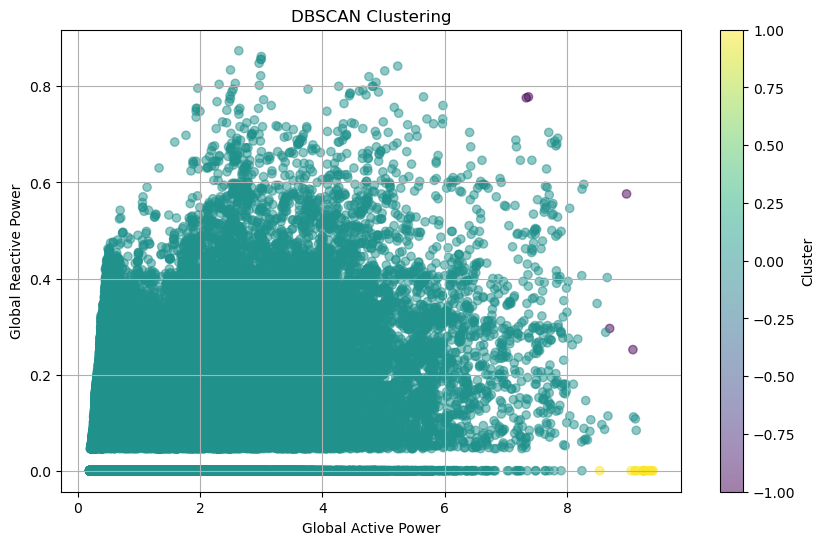

In [47]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(numeric_df['Global_active_power'][:100000], numeric_df['Global_reactive_power'][:100000], c=labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [96]:
test_dataframe = pd.DataFrame(numeric_df[['Global_active_power', 'Global_reactive_power']])
test_dataframe= test_dataframe.rename(columns={'Global_active_power': 'x', 'Global_reactive_power': 'y'})
test_dataframe

,x,y
0,4.216,0.418
1,5.360,0.436
2,5.374,0.498
3,5.388,0.502
4,3.666,0.528
...,...,...
2075254,0.946,0.000
2075255,0.944,0.000
2075256,0.938,0.000
2075257,0.934,0.000


In [97]:
# Add new columns with default values
test_dataframe['cluster'] = np.nan
test_dataframe['num_neighbors'] = 0
test_dataframe['neighbors'] = ''

# Display the DataFrame with the new columns
test_dataframe

,x,y,cluster,num_neighbors,neighbors
0,4.216,0.418,NaN,0,
1,5.360,0.436,NaN,0,
2,5.374,0.498,NaN,0,
3,5.388,0.502,NaN,0,
4,3.666,0.528,NaN,0,
...,...,...,...,...,...
2075254,0.946,0.000,NaN,0,
2075255,0.944,0.000,NaN,0,
2075256,0.938,0.000,NaN,0,
2075257,0.934,0.000,NaN,0,


In [98]:

def neighborhood_creation(dataframe, epsilon):
    xy_columns = dataframe[['x', 'y']]
    distances = pdist(xy_columns.values)
    distances_matrix = squareform(distances)
    for i in range(len(dataframe)):
        neighbors = []
        for j in range(len(dataframe)):
            if distances_matrix[i][j]<=epsilon:
                neighbors.append(j)
        dataframe.loc[i, 'num_neighbors'] = len(neighbors)
        dataframe.loc[i, 'neighbors'] = ','.join(str(x) for x in neighbors)

def dbscan_own_impl(dataframe, epsilon = 7.5, minPts = 3):
    neighborhood_creation(dataframe, epsilon)
    core_points_list = dataframe.index[dataframe['num_neighbors'] >= 3].tolist()
    visited = 0
    cluster_no = 1
    while core_points_list:
        current_core_point = core_points_list.pop()
        if pd.isna(dataframe.loc[current_core_point, 'cluster']): 
            dataframe.loc[current_core_point, 'cluster'] = cluster_no
            all_core_neighbours_covered = False
            points_to_be_visited = set([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
            while points_to_be_visited:
                current_core_point = points_to_be_visited.pop()
                if pd.isna(dataframe.loc[current_core_point, 'cluster']):
                    dataframe.loc[current_core_point, 'cluster'] = cluster_no
                    if dataframe.loc[current_core_point, 'num_neighbors'] >= minPts:
                        points_to_be_visited.update([int(x) for x in dataframe.loc[current_core_point, 'neighbors'].split(',')])
                        if current_core_point in core_points_list:
                            core_points_list.remove(current_core_point)
            cluster_no+=1
    dataframe.loc[dataframe['cluster'].isna(), 'cluster'] = -1


In [99]:
dbscan_own_impl(test_dataframe[:5000], 0.5, 10)

In [100]:

# Calculate silhouette score
silhouette_avg = silhouette_score(test_dataframe[['x','y']][:5000], test_dataframe['cluster'][:5000])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7329766139505184


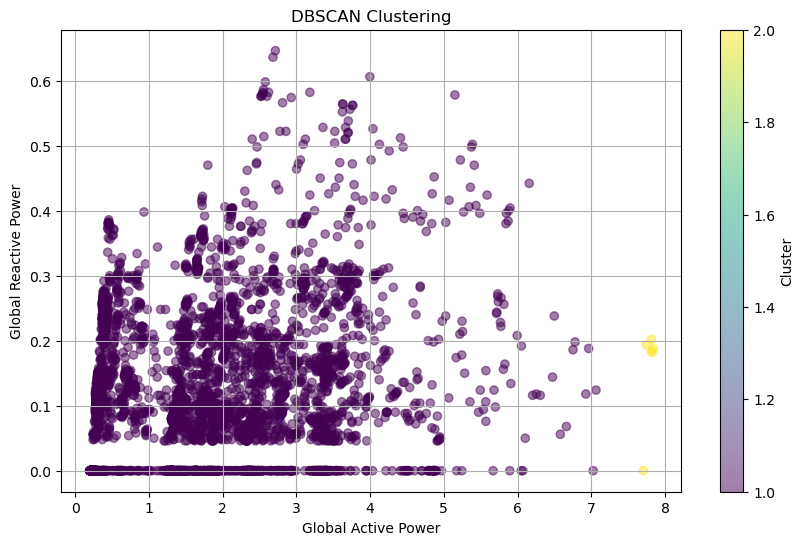

In [101]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(test_dataframe['x'][:5000], test_dataframe['y'][:5000], c=test_dataframe['cluster'][:5000], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#### Why DBSCAN Might not work
1. If the feature space is high-dimensional and the density varies greatly across dimensions, DBSCAN might struggle to find meaningful clusters. 
2. If the dataset has very noisy or sparse regions, DBSCAN might end up merging unrelated clusters or splitting a single cluster into multiple smaller ones.


#### Why DBSCAN might work
1. DBSCAN can identify dense regions in the image space corresponding to different types of fashion items. If the images are well-separated by low-density regions and noise is minimal (e.g., due to background clutter), DBSCAN can accurately cluster similar items.

# PROBLEM 8: Hierarchical Clustering

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy

df = pd.read_csv('moons.csv')
df = df.rename(columns={'Xmoons_X1': 'x', 'Xmoons_X2': 'y'})


# Calculate pairwise distances between data points
distances = pdist(df.values)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward').fit(df)

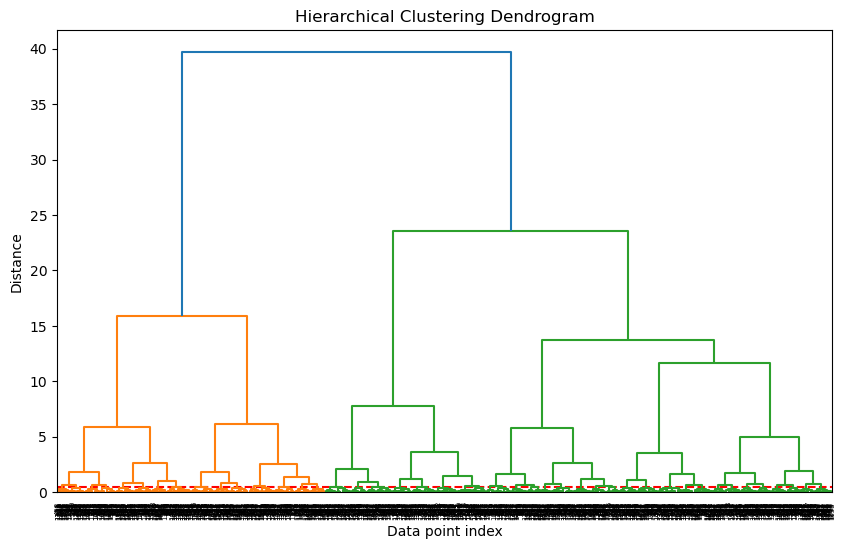

Cluster labels: [21 40 11 ...  6 45 31]


In [49]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.axhline(y=0.5, color='r', linestyle='--')  # Adjust the distance threshold as needed
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(distances, method='ward'))
plt.show()

# Print cluster labels
print("Cluster labels:", clustering.labels_)


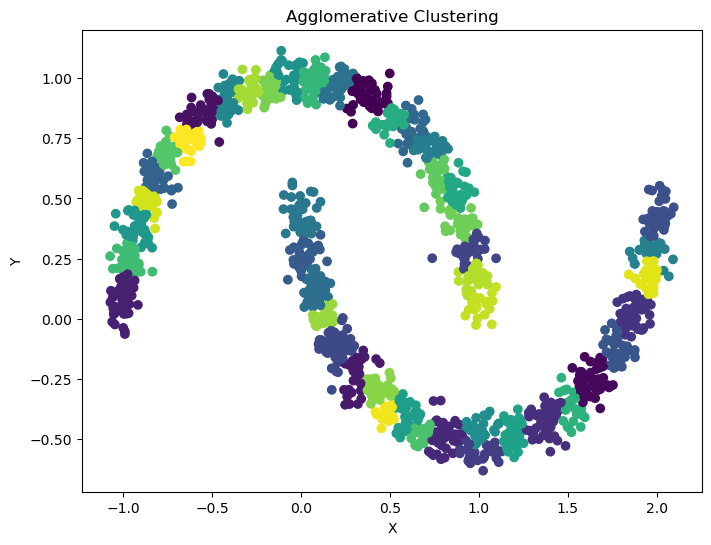

In [50]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

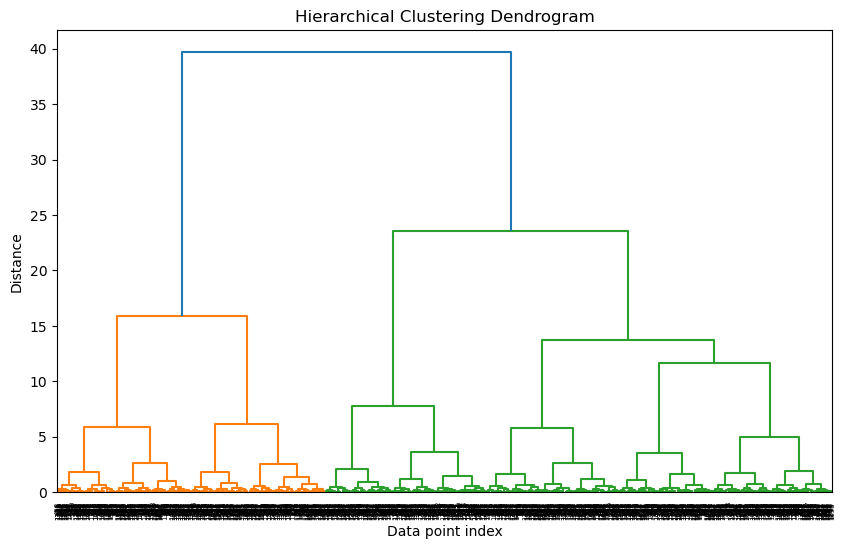

Cluster labels: [0 1 2 ... 2 0 0]


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy

# Load your dataset, for example, using pandas
df = pd.read_csv('moons.csv')
df = df.rename(columns={'Xmoons_X1': 'x', 'Xmoons_X2': 'y'})

# Preprocess your data if necessary

# Calculate pairwise distances between data points
distances = pdist(df.values)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df)

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(distances, method='ward'))
plt.show()

# Print cluster labels
print("Cluster labels:", clustering.labels_)


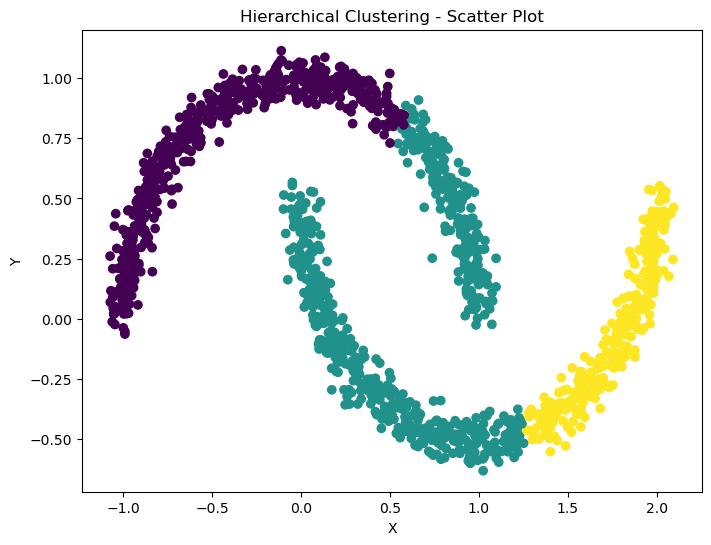

In [52]:
# Scatter plot with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=clustering.labels_, cmap='viridis')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from tqdm import tqdm

In [2]:
df = pd.read_csv("moons.csv")

In [3]:
df.rename(columns={"Xmoons_X1":"x", "Xmoons_X2":"y"}, inplace=True)

In [4]:
df.shape

(1500, 2)

## With Library functions


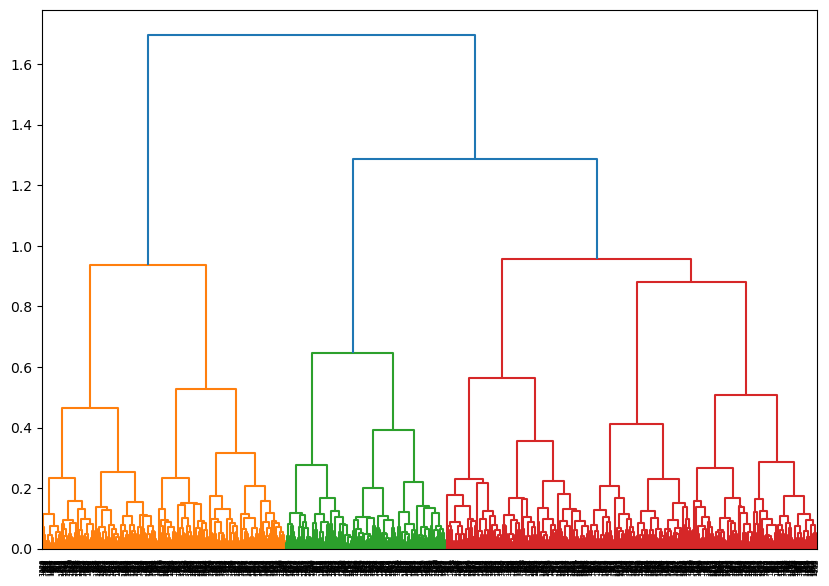

CPU times: total: 14.4 s
Wall time: 24 s


In [23]:
%%time
# Perform hierarchical clustering
Z = linkage(df, method='average')

# Visualize the hierarchy
plt.figure(figsize=(10,  7))
dendrogram(Z, labels=df.index, leaf_rotation=90.)
plt.show()



In [24]:
#### Access clusters at a particular level
# The level parameter in fcluster is the maximum number of clusters you want to have
clusters = fcluster(Z, t=2, criterion='maxclust', )

# Add the cluster labels to the original dataframe
df['cluster'] = clusters

print(df)

             x         y  cluster
0    -0.378142  0.940750        1
1     0.933566  0.153805        2
2     2.048309  0.498172        2
3     0.947891  0.162473        2
4     2.000739  0.183700        2
...        ...       ...      ...
1495 -0.022346  0.425338        2
1496  0.090974  0.098361        2
1497  1.390850 -0.439987        2
1498 -0.652389  0.769648        1
1499 -0.900280  0.195603        1

[1500 rows x 3 columns]


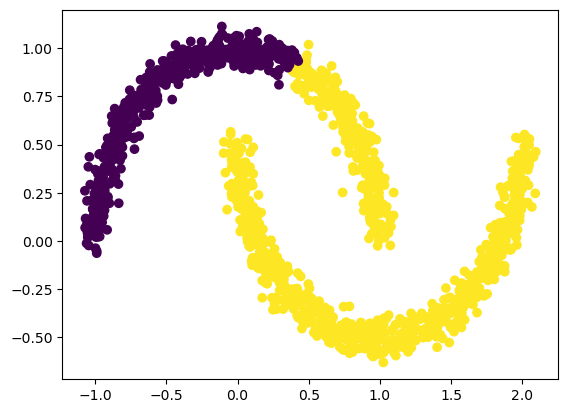

In [25]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.show()

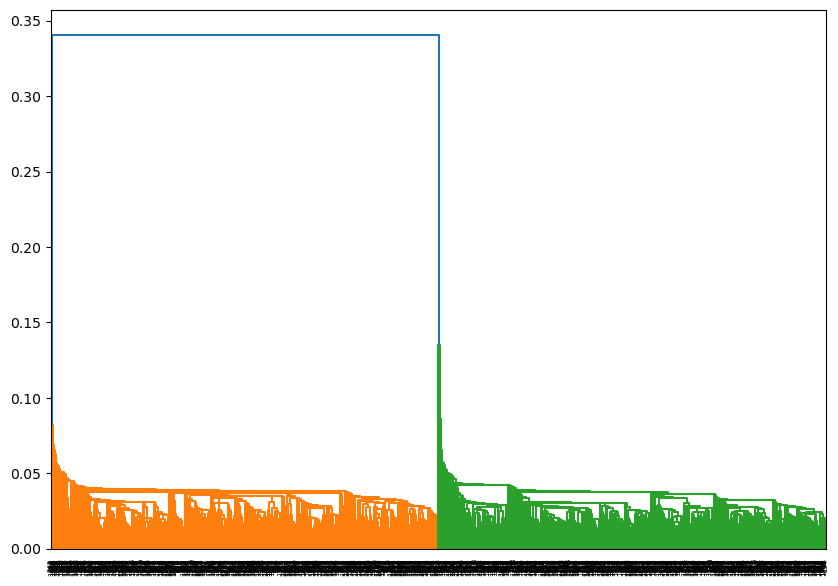

CPU times: total: 15 s
Wall time: 22.9 s


In [5]:
%%time
# Perform hierarchical clustering
Z = linkage(df, method='single')

# Visualize the hierarchy
plt.figure(figsize=(10,  7))
dendrogram(Z, labels=df.index, leaf_rotation=90.)
plt.show()



In [6]:
#### Access clusters at a particular level
# The level parameter in fcluster is the maximum number of clusters you want to have
clusters = fcluster(Z, t=2, criterion='maxclust', )

# Add the cluster labels to the original dataframe
df['cluster'] = clusters

print(df)

             x         y  cluster
0    -0.378142  0.940750        2
1     0.933566  0.153805        2
2     2.048309  0.498172        1
3     0.947891  0.162473        2
4     2.000739  0.183700        1
...        ...       ...      ...
1495 -0.022346  0.425338        1
1496  0.090974  0.098361        1
1497  1.390850 -0.439987        1
1498 -0.652389  0.769648        2
1499 -0.900280  0.195603        2

[1500 rows x 3 columns]


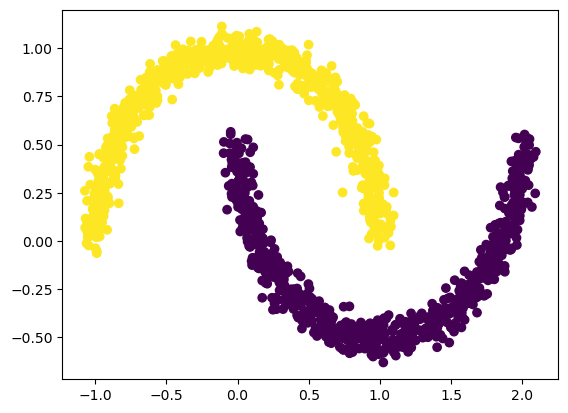

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.show()

## Without Library functions


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm

df = pd.read_csv("moons.csv")
df.rename(columns={"Xmoons_X1":"x", "Xmoons_X2":"y"}, inplace=True)
df.shape

(1500, 2)

In [9]:
sample_df = df.sample(500)
sample_df.shape

(500, 2)

In [10]:
class Cluster:
    def __init__(self, point=[], centroid=None, id="1", parent1 = None, parent2 = None):
        if len(point) > 0:
            self.points = [point]
        else:
            self.points = []
        self.centroid = centroid
        self.id = id
        self.parent1 = parent1
        self.parent2 = parent2

    def add_point(self, point):
        self.points.append(point)
        self.centroid = np.mean(self.points, axis=0)

    def get_size(self):
        return len(self.points)


        
def hierarchical_clustering(points, k):
    # Initialize each point as its own cluster
    clusters = [Cluster(point  = point, centroid  = point, id=id) for id, point in enumerate(points)]
    all_clusters = clusters.copy()
    
    new_cluster_id = len(clusters)
    
    while len(clusters) > k:
        # Calculate distances between all clusters
        distances = pdist([c.centroid for c in clusters], 'euclidean')
        distances = squareform(distances)
        
        # Create a mask to exclude the diagonal elements (distance of a cluster to itself)
        np.fill_diagonal(distances, np.inf)
        
        # Find the two closest clusters
        min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
        cluster1, cluster2 = clusters[min_index[0]], clusters[min_index[1]]
        
        # Merge the two closest clusters
        new_cluster = Cluster(centroid = np.mean([cluster1.centroid, cluster2.centroid], axis=0), 
                              id=new_cluster_id,
                              parent1 = cluster1,
                              parent2 = cluster2
                             )
        new_cluster_id += 1
        new_cluster.points.extend(cluster1.points)
        new_cluster.points.extend(cluster2.points)
        
        # Remove the two closest clusters and add the new cluster
        clusters.remove(cluster1)
        clusters.remove(cluster2)
        clusters.append(new_cluster)
        all_clusters.append(new_cluster)
    
    return clusters, all_clusters


In [11]:
points = sample_df.to_numpy()
points.shape

(500, 2)

In [12]:
clusters, all_clusters = hierarchical_clustering(points,  1)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster.centroid}")

Cluster 1: [0.79752867 0.26417665]


In [13]:
len(all_clusters)

999

In [14]:
def print_scatterplot_clusters(clusters):
    result = pd.DataFrame(columns=["x", "y","cluster"])
    for c in clusters:
        temp = pd.DataFrame(c.points, columns=["x", "y"])
        temp["cluster"] = c.id
        result = pd.concat([result, temp], ignore_index=True)
    result
    plt.scatter(result['x'], result['y'], c=result['cluster'])
    plt.show()

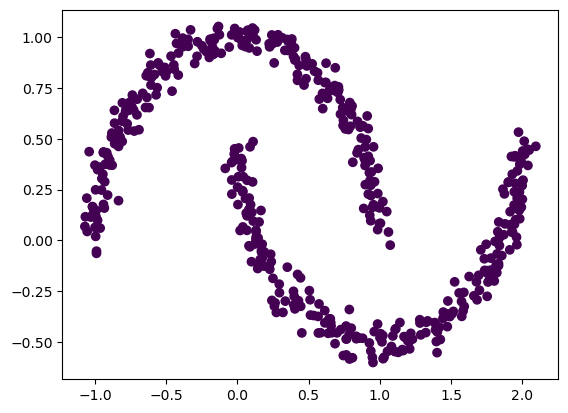

In [15]:
print_scatterplot_clusters(clusters)

In [16]:
def findatk(all_clusters, k):
    root_cluster = all_clusters[-1]
    result = {root_cluster.id : root_cluster}
    # print(f"root = {root_cluster.id}")
    for _ in range(k-1):
        current_cluster = result.pop(max(result.keys()))
        result[current_cluster.parent1.id] = current_cluster.parent1
        result[current_cluster.parent2.id] = current_cluster.parent2
        
    print(result.keys())
    return result.values()


dict_keys([998])


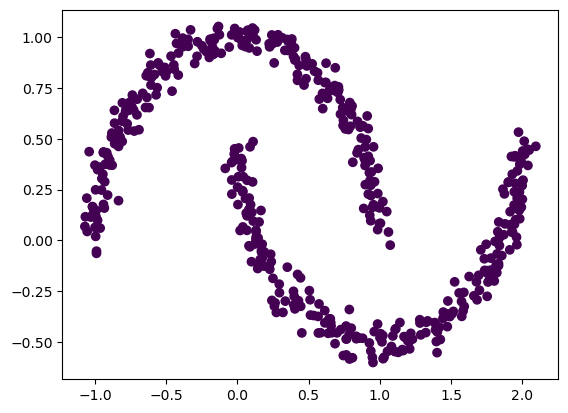

In [17]:
print_scatterplot_clusters(findatk(all_clusters, k=1))

dict_keys([995, 997])


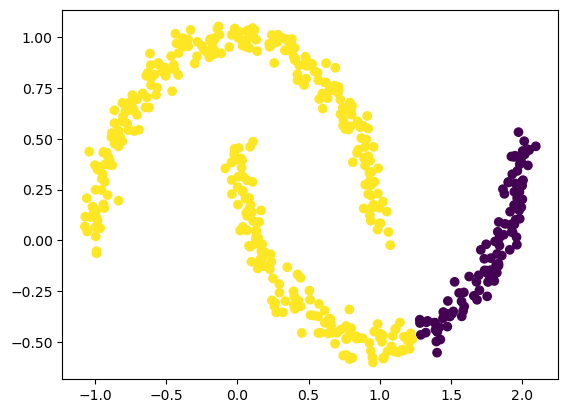

In [18]:
print_scatterplot_clusters(findatk(all_clusters, k=2))

dict_keys([995, 992, 996])


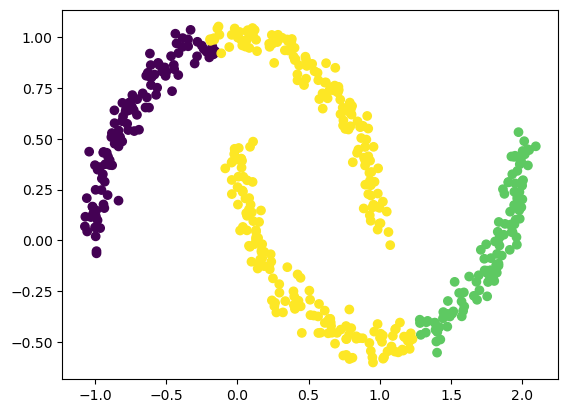

In [19]:
print_scatterplot_clusters(findatk(all_clusters, k=3))

dict_keys([995, 992, 989, 994])


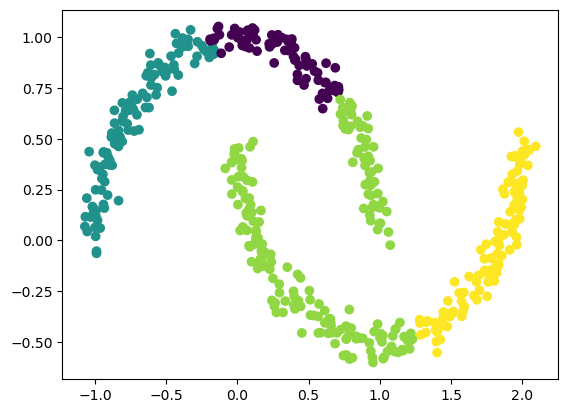

In [20]:
print_scatterplot_clusters(findatk(all_clusters, k=4))

dict_keys([992, 989, 994, 985, 986])


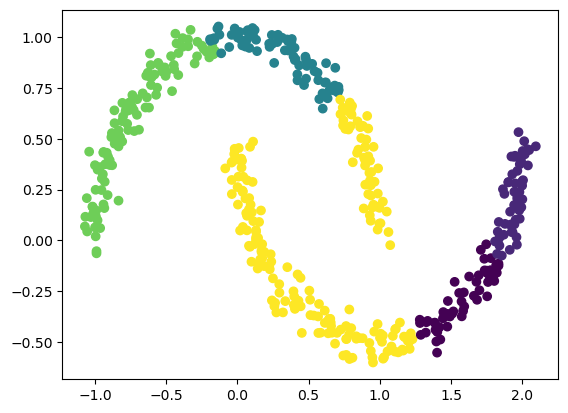

In [21]:
print_scatterplot_clusters(findatk(all_clusters, k=5))

dict_keys([989, 985, 986, 987, 988, 983, 980, 982, 957, 984])


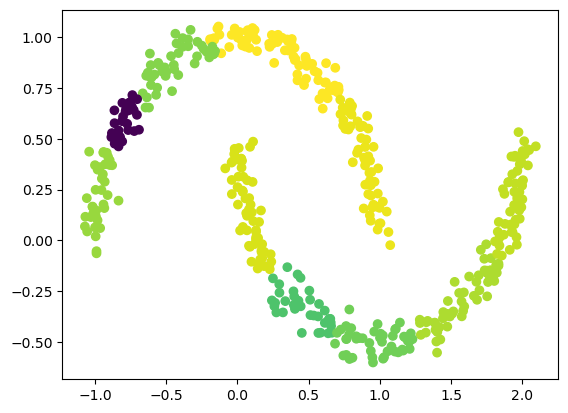

In [22]:
print_scatterplot_clusters(findatk(all_clusters, k=10))